In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
DATASETS_PATH = os.path.join('..', 'datasets')
ANALISIS_SUBSET_PATH = os.path.join(DATASETS_PATH, 'subset_analisis.csv')
ML_SUBSET1_PATH = os.path.join(DATASETS_PATH, 'subset_clasif.csv')
ML_SUBSET2_PATH = os.path.join(DATASETS_PATH, 'subset_regres.csv')

### Información útil

In [4]:
tipos_dic = {
    0: 'Infectado',
    1: 'Fallecido'
}

In [5]:
generos_dic = {
    0: 'Hombre',
    1: 'Mujer'
}

In [6]:
meses_dic = {
    1: 'ENE',
    2: 'FEB',
    3: 'MAR',
    4: 'ABR',
    5: 'MAY',
    6: 'JUN',
    7: 'JUL',
    8: 'AGO',
    9: 'SEP',
    10: 'OCT',
    11: 'NOV',
    12: 'DIC'
}

In [7]:
sectores_dic = {
    1: 'CRUZ ROJA',
    2: 'DIF',
    3: 'ESTATAL',
    4: 'IMSS',
    5: 'IMSS-BIENESTAR',
    6: 'ISSSTE',
    7: 'MUNICIPAL',
    8: 'PEMEX',
    9: 'PRIVADA',
    10: 'SEDENA',
    11: 'SEMAR',
    12: 'SSA',
    13: 'UNIVERSITARIO',
    14: 'DESC.',
    99: 'NO ESPEC.'
}

In [8]:
estados_dic = {
    1: 'AGS',
    2: 'BC',
    3: 'BCS',
    4: 'CAM',
    5: 'COAH',
    6: 'COL',
    7: 'CHIA',
    8: 'CHIH',
    9: 'CDMX',
    10: 'DUR',
    11: 'GJTO',
    12: 'GUE',
    13: 'HID',
    14: 'JAL',
    15: 'EDOMEX',
    16: 'MICH',
    17: 'MOR',
    18: 'NAY',
    19: 'NLEON',
    20: 'OAX',
    21: 'PUE',
    22: 'QUE',
    23: 'QROO',
    24: 'SLP',
    25: 'SIN',
    26: 'SON',
    27: 'TAB',
    28: 'TAM',
    29: 'TLAX',
    30: 'VER',
    31: 'YUC',
    32: 'ZAC',
    36: 'EUM',
    97: 'NA',
    98: 'IGNORA',
    99: 'NOESPEC'
}

In [9]:
dtypes = {
    'SECTOR': np.int8,
    'ENTIDAD_UM': np.int8,
    'SEXO': np.int8,
    'PAC_HOSPITALIZADO': np.int8,
    'INTUBADO': np.int8,
    'NEUMONIA': np.int8,
    'EDAD': np.int8,
    'EMBARAZO': np.int8,
    'DIABETES': np.int8,
    'EPOC': np.int8,
    'ASMA': np.int8,
    'INMUSUPR': np.int8,
    'HIPERTENSION': np.int8,
    'CARDIOVASCULAR': np.int8,
    'OBESIDAD': np.int8,
    'RENAL_CRONICA': np.int8,
    'TABAQUISMO': np.int8,
    'UCI': np.int8,
    'MES_INGRESO': np.int8,
    'AÃO_INGRESO': np.int16,
    'MES_DEF': np.int8,
    'AÃO_DEF': np.int16,
}

### Cargando Datos

In [10]:
analisis_df = pd.read_csv(ANALISIS_SUBSET_PATH, dtype=dtypes, index_col=0, encoding='latin')
analisis_df.info()

C:\Users\Sebastián\AppData\Roaming\Python\Python38\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832786 entries, 0 to 11703510
Data columns (total 22 columns):
 #   Column             Dtype
---  ------             -----
 0   SECTOR             int8 
 1   ENTIDAD_UM         int8 
 2   SEXO               int8 
 3   PAC_HOSPITALIZADO  int8 
 4   INTUBADO           int8 
 5   NEUMONIA           int8 
 6   EDAD               int8 
 7   EMBARAZO           int8 
 8   DIABETES           int8 
 9   EPOC               int8 
 10  ASMA               int8 
 11  INMUSUPR           int8 
 12  HIPERTENSION       int8 
 13  CARDIOVASCULAR     int8 
 14  OBESIDAD           int8 
 15  RENAL_CRONICA      int8 
 16  TABAQUISMO         int8 
 17  UCI                int8 
 18  MES_INGRESO        int8 
 19  AÃO_INGRESO       int16
 20  MES_DEF            int8 
 21  AÃO_DEF           int16
dtypes: int16(2), int8(20)
memory usage: 117.0 MB


In [11]:
analisis_df.rename({'AÃO_INGRESO': 'AÑO_INGRESO', 'AÃO_DEF': 'AÑO_DEF'}, axis=1, inplace=True)

In [12]:
clasif_df = pd.read_csv(ML_SUBSET1_PATH, dtype=np.int8, index_col=0)
clasif_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832786 entries, 0 to -42
Data columns (total 16 columns):
 #   Column             Dtype
---  ------             -----
 0   SEXO               int8 
 1   PAC_HOSPITALIZADO  int8 
 2   NEUMONIA           int8 
 3   EDAD               int8 
 4   EMBARAZO           int8 
 5   DIABETES           int8 
 6   EPOC               int8 
 7   ASMA               int8 
 8   INMUSUPR           int8 
 9   HIPERTENSION       int8 
 10  CARDIOVASCULAR     int8 
 11  OBESIDAD           int8 
 12  RENAL_CRONICA      int8 
 13  TABAQUISMO         int8 
 14  DIAS_SINTOMAS      int8 
 15  FALLECIDO          int8 
dtypes: int8(16)
memory usage: 87.7 MB


In [13]:
regres_df = pd.read_csv(ML_SUBSET2_PATH, dtype=np.int16, index_col=0)
regres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287282 entries, 73 to -29124
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   SEXO               287282 non-null  int16
 1   PAC_HOSPITALIZADO  287282 non-null  int16
 2   NEUMONIA           287282 non-null  int16
 3   EDAD               287282 non-null  int16
 4   EMBARAZO           287282 non-null  int16
 5   DIABETES           287282 non-null  int16
 6   EPOC               287282 non-null  int16
 7   ASMA               287282 non-null  int16
 8   INMUSUPR           287282 non-null  int16
 9   HIPERTENSION       287282 non-null  int16
 10  CARDIOVASCULAR     287282 non-null  int16
 11  OBESIDAD           287282 non-null  int16
 12  RENAL_CRONICA      287282 non-null  int16
 13  TABAQUISMO         287282 non-null  int16
 14  DIAS_SINTOMAS      287282 non-null  int16
 15  DIAS_DEF           287282 non-null  int16
dtypes: int16(16)
memory usage: 11.0 MB


In [14]:
def is_dead(x):
    if x==9999: return 0
    else: return 1

In [15]:
analisis_df['FALLECIDO'] = analisis_df['AÑO_DEF'].apply(is_dead).astype(np.int8)

# Generando gráficas interesantes

Tenemos planeado responder las siguientes cuestiones:

- Comparación de infectados y muertos por estado (Gráf. vertical de barras apiladas)
- Porcentaje de fallecidos e infectados por ordenados estado (Graf. vert de barras apiladas)
- Comparación de infectados y muertos por género (Gráf. horizontal de barras apiladas)
- Días que toma a un paciente fallecer según edad (Gráf . de dispersión)
- Progreso de la pandemia cada mes (Gráf. de línea)
- Distribución de pacientes según edad (Histograma)
- Infectados y fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)
- Porcentaje de infectados vs. fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)
- Infectados y fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)
- Porcentaje de infectados vs. fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)
- Porcentaje de infectados vs. fallecidos según affeciones de salud previas (Graf. horiz. de barras apiladas)

## Comparación de infectados y fallecidos por estado

Primero agrupamos los datos por estado y luego por tipo de paciente, y después generamos el conteo

In [91]:
conteo_estado = analisis_df[['FALLECIDO']].groupby([analisis_df['ENTIDAD_UM'], analisis_df['FALLECIDO']]).count()

Para graficar los datos, necesitamos cambiar el formato de los datos, así como el nombre de las variables y los valores que poseen. Para ello, programamos una pequeña función que nos devuelve un dataframe en un formato que esté listo para graficar.

#### Funcion para formatear dataframe

In [92]:
def create_plot_dataframe(data, key1, key2, keyvals, newkey1, newkey2, newkeyvals, newvals1, newvals2):
    df = data.copy()
    # Cambiar nombre columna repetida
    df.rename({keyvals: newkeyvals}, axis=1, inplace=True)
    # Unravel
    df.reset_index(inplace=True)
    # Cambiar nombres columnas nuevas
    df.rename({key1: newkey1, key2: newkey2}, axis=1, inplace=True)
    # Cambiar valores
    if(newvals1): df[newkey1] = df[newkey1].apply(lambda x: newvals1[x])
    if(newvals2): df[newkey2] = df[newkey2].apply(lambda x: newvals2[x])
    # Regresar pivote
    pivote = df.pivot(index=newkey1, columns=newkey2, values=newkeyvals)
    return pivote.fillna(0).astype('int64')

In [93]:
conteo_estado = create_plot_dataframe(conteo_estado, 'ENTIDAD_UM', 'FALLECIDO', 'FALLECIDO', 'ENTIDAD', 'TIPO', 'CONTEO', estados_dic, tipos_dic)

In [96]:
conteo_estado

TIPO,Fallecido,Infectado
ENTIDAD,,
AGS,2969,33515
BC,9687,66660
BCS,2323,53753
CAM,2016,22580
CDMX,51672,1063811
CHIA,2119,19967
CHIH,8121,62996
COAH,7518,87705
COL,2191,31498


Los datos de la CDXM son mucho más altos que los demás, y esto puede causar que la gráfica se vea mal. Para evitar problemas, removemos los registros de la CDMX.

In [94]:
conteo_estado_sin_cdmx = conteo_estado.drop('CDMX', axis=0)

Una vez formateado el dataframe, podemos graficar los datos en una sólo línea de código, usando la integración de Pandas con Matplotlib.

<AxesSubplot:xlabel='ENTIDAD'>

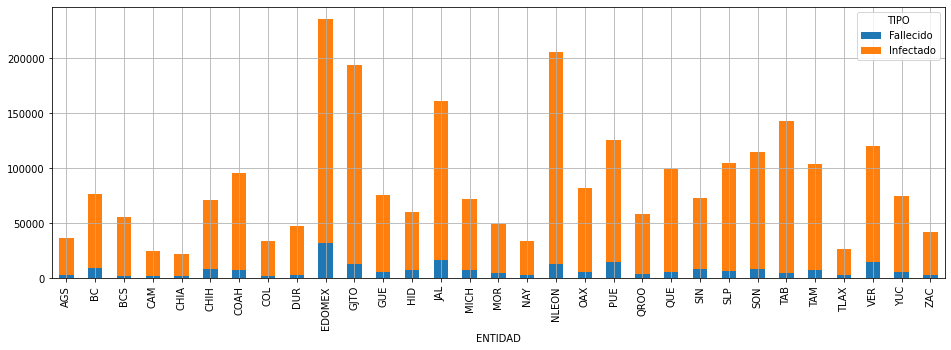

In [95]:
conteo_estado_sin_cdmx.plot(kind='bar', stacked=True, figsize=(16,5), grid=True)

#### Datos de la CDMX

<AxesSubplot:xlabel='TIPO'>

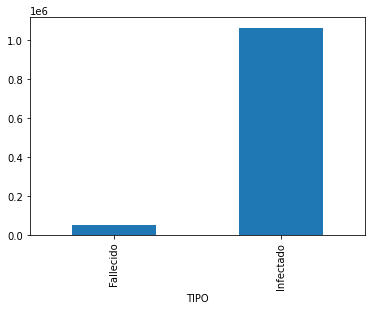

In [97]:
conteo_estado.loc['CDMX'][['Fallecido', 'Infectado']].plot(kind='bar')

## Porcentaje de fallecidos por estado

In [21]:
conteo_estado['% de fallecidos'] = conteo_estado.apply(lambda x: (x.Fallecido/(x.Fallecido + x.Infectado))*100, axis=1)

In [22]:
conteo_estado.head(3)

TIPO,Fallecido,Infectado,% de fallecidos
ENTIDAD,,,
AGS,2969,33515,8.137814
BC,9687,66660,12.688121
BCS,2323,53753,4.142592


In [23]:
conteo_estado_ordenado = conteo_estado.sort_values('% de fallecidos', axis=0, ascending=False)
conteo_estado_ordenado.head(3)

TIPO,Fallecido,Infectado,% de fallecidos
ENTIDAD,,,
EDOMEX,32332,202589,13.762925
BC,9687,66660,12.688121
HID,7674,52913,12.666083


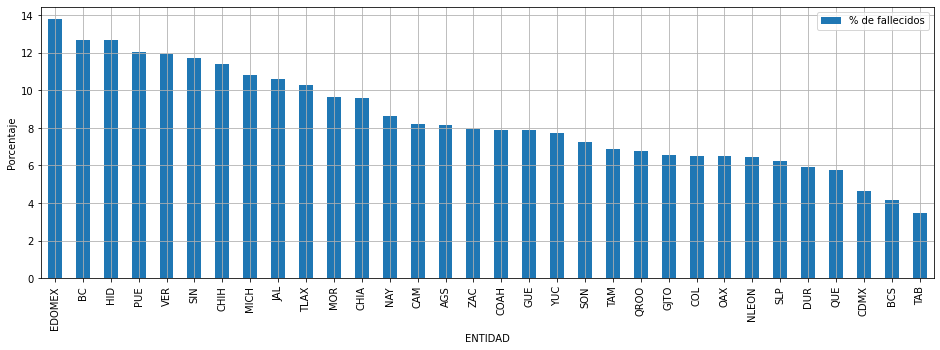

In [24]:
conteo_estado_ordenado.plot(y='% de fallecidos', kind='bar', figsize=(16, 5), grid=True)
_ = plt.ylabel('Porcentaje')

## Comparación de infectados y muertos por género

In [25]:
conteo_genero = analisis_df[['FALLECIDO']].groupby([analisis_df['SEXO'], analisis_df['FALLECIDO']]).count()
conteo_genero

FALLECIDO
SEXO FALLECIDO           
0    0            1736432
     1             177567
1    0            1808799
     1             109988

In [26]:
conteo_genero = create_plot_dataframe(conteo_genero, 'SEXO', 'FALLECIDO', 'FALLECIDO', 'SEXO', 'RESULTADO', 'CONTEO',
                                     generos_dic, tipos_dic)
conteo_genero

RESULTADO,Fallecido,Infectado
SEXO,,
Hombre,177567,1736432
Mujer,109988,1808799


<AxesSubplot:xlabel='SEXO'>

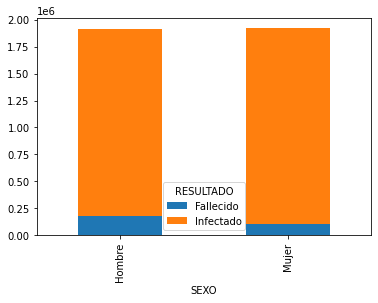

In [27]:
conteo_genero.plot(kind='bar', stacked=True)

No parece haber una diferencia sustancial entre la cantidad de infectados por género, aunque sí se nota un mayor número de fallecidos en el género masculino.

## Días que toma a un paciente fallecer según edad

#### Diag. de Dispersión

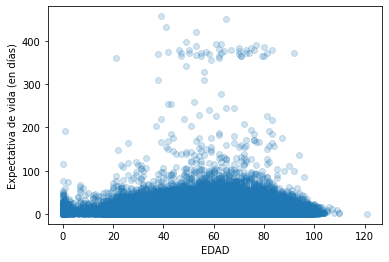

In [28]:
plt.scatter(x=regres_df['EDAD'], y=regres_df['DIAS_DEF'], alpha=0.2)
plt.xlabel('EDAD')
plt.ylabel('Expectativa de vida (en días)')
plt.show()

El diag. de dispersión nos ayuda a interpretar la situación, pero vale la pena hcerlo de otra manera.

In [29]:
def get_age_group(x):
    if x <= 5: return 'Bebé'
    elif x <= 12: return 'Infante'
    elif x <= 21: return 'Adolescente'
    elif x <= 40: return 'Adulto Joven'
    elif x <= 65: return 'Adulto'
    else: return 'Adulto Mayor'

In [30]:
regres_df['GRUPO_EDAD'] = regres_df['EDAD'].apply(get_age_group)

In [31]:
fall_edades = regres_df[['GRUPO_EDAD', 'EDAD']].groupby(['GRUPO_EDAD']).count()
# fall_edades.rename({'EDAD': 'No. de Fallecidos'}, axis=1, inplace=True)
fall_edades

,EDAD
GRUPO_EDAD,
Adolescente,887
Adulto,135518
Adulto Joven,19509
Adulto Mayor,130694
Bebé,496
Infante,178


#### Diag. de caja y bigote

<AxesSubplot:xlabel='GRUPO_EDAD', ylabel='DIAS_DEF'>

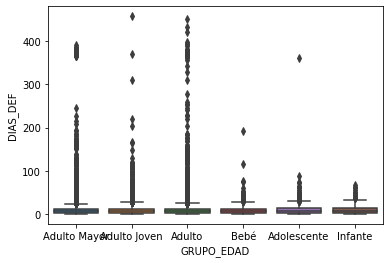

In [32]:
sns.boxplot(x='GRUPO_EDAD', y="DIAS_DEF", data=regres_df)

En variables con un gran sesgo, el diag. de caja nos muestra varios outliers y hace difícil la interpretación

In [33]:
regres_df.head(3)

,SEXO,PAC_HOSPITALIZADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DIAS_SINTOMAS,DIAS_DEF,GRUPO_EDAD
73,1,1,1,66,0,1,0,0,0,1,0,1,0,0,3,1,Adulto Mayor
186,1,1,1,30,0,0,0,0,0,0,0,0,1,0,0,0,Adulto Joven
217,0,1,1,58,0,1,0,0,0,1,1,0,1,0,2,3,Adulto


#### Histograma

In [34]:
# sns.displot(x='DIAS_DEF', hue='GRUPO_EDAD', data=regres_df)
# Da error "cannot reindex from a duplicate axis"

Para cada grupo de edad, es posible ver desde otra perspectiva la frecuencia con la que un paciente tarde en fallecer. Sin embargo, el diag. de dispersión anterior es más simple que este, por lo que lo elegimos para describir los días que le toma a un paciente fallecer según su edad.

## Distribución de pacientes según edad (Histograma)

<AxesSubplot:ylabel='Frequency'>

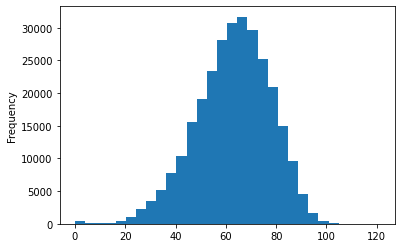

In [35]:
regres_df['EDAD'].plot(kind='hist', bins=30)

Como pudimos comprobar en la sección anterior, la mayoría de pacientes se encuentran entre los 40 y los 80 años, con un ligero sesgo hacia la izquierda, es decir, hacia los adultos jóvenes.

## Infectados y fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)

Creamos grupos de edad en el dataset y agrupamos por sector de edad y por número de infectados/fallecidos

In [36]:
analisis_df['GRUPO_EDAD'] = analisis_df['EDAD'].apply(get_age_group)

In [37]:
conteo_grupo_edad= analisis_df[['FALLECIDO']].groupby([analisis_df['GRUPO_EDAD'], analisis_df['FALLECIDO']]).count()

In [38]:
conteo_grupo_edad = create_plot_dataframe(conteo_grupo_edad, 'GRUPO_EDAD', 'FALLECIDO', 'FALLECIDO',
                                      'GRUPO DE EDAD', 'RESULTADO', 'CONTEO',
                                      None, tipos_dic)

In [39]:
conteo_grupo_edad = conteo_grupo_edad.reindex(axis=0, labels=['Bebé', 'Infante', 'Adolescente', 'Adulto Joven', 'Adulto', 'Adulto Mayor'])

In [40]:
conteo_grupo_edad

RESULTADO,Fallecido,Infectado
GRUPO DE EDAD,,
Bebé,496,34199
Infante,179,72031
Adolescente,890,305972
Adulto Joven,19524,1579942
Adulto,135649,1311249
Adulto Mayor,130817,241838


Una vez generados los datos, graficamos

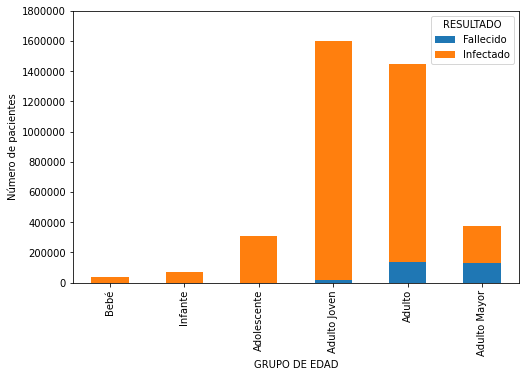

In [41]:
conteo_grupo_edad.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.yticks(ticks=range(0, 2000000, 200000), labels=range(0, 2000000, 200000))
plt.ylabel('Número de pacientes')
plt.show()

## Porcentaje de infectados vs. fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)

In [42]:
func = lambda x: (x.Fallecido/(x.Fallecido + x.Infectado))*100
conteo_grupo_edad['% de fallecidos'] = conteo_grupo_edad.apply(func, axis=1)

In [43]:
conteo_grupo_edad_ordenado = conteo_grupo_edad.sort_values('% de fallecidos', axis=0, ascending=False)
conteo_grupo_edad_ordenado.head(3)

RESULTADO,Fallecido,Infectado,% de fallecidos
GRUPO DE EDAD,,,
Adulto Mayor,130817,241838,35.104051
Adulto,135649,1311249,9.375160
Bebé,496,34199,1.429601


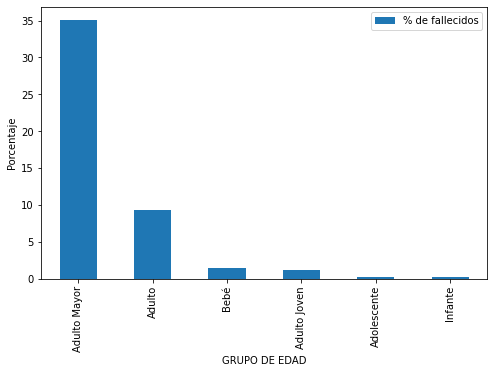

In [44]:
conteo_grupo_edad_ordenado.plot(y='% de fallecidos', kind='bar', figsize=(8, 5))
_ = plt.ylabel('Porcentaje')

## Infectados y fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)

In [45]:
conteo_sectores = analisis_df.groupby(['SECTOR', 'FALLECIDO']).count()[['EDAD']]

In [46]:
conteo_sectores = create_plot_dataframe(conteo_sectores, 'SECTOR', 'FALLECIDO', 'EDAD',
                                       'SECTOR', 'RESULTADO', 'CONTEO',
                                       sectores_dic, tipos_dic)

In [47]:
conteo_sectores.head(3)

RESULTADO,Fallecido,Infectado
SECTOR,,
CRUZ ROJA,30,338
DESC.,0,1
DIF,5,948


Hay sistemas que cuidan de una gran cantidad de pacientes, mientras que otros sólo han atendido a un puñado de ellos en relación a la población total de infectados. Vamos a eliminar de la gráfica aquellos sistemas que no contribuyen significativamente al conteo total de infectado y fallecidos (al menos 1% de los mismos), y agruparlos en una categoría llamada "OTROS SISTEMAS".

In [48]:
# Encontramos aquellos sectores que no contribuyen al menos al 1% del total de infectados y fallecidos
total_registros = conteo_sectores.sum().sum()
minimo_sig = total_registros // 100
sectores_no_sig = conteo_sectores.apply(lambda x: True if (x.Fallecido + x.Infectado) < minimo_sig else False, axis=1)

In [49]:
# Calculamos el total de infectados y fallecidos de los sectores no significativos
suma_otros_sistemas = conteo_sectores[sectores_no_sig].sum()
suma_otros_sistemas

RESULTADO
Fallecido    11890
Infectado    76594
dtype: int64

In [50]:
# Eliminamos los sectores no significativos
conteo_sectores_sig = conteo_sectores.drop(conteo_sectores[sectores_no_sig].index, axis=0)

In [51]:
# Agregamos un nuevo registro representando todos los sectores no significativos
conteo_sectores_sig.loc['OTROS SISTEMAS'] = suma_otros_sistemas.values

In [52]:
conteo_sectores_sig

RESULTADO,Fallecido,Infectado
SECTOR,,
ESTATAL,3985,38640
IMSS,161083,1321244
ISSSTE,21020,94638
PRIVADA,5704,101271
SSA,83873,1912844
OTROS SISTEMAS,11890,76594


Una vez sintetizados los datos, procedemos a graficar

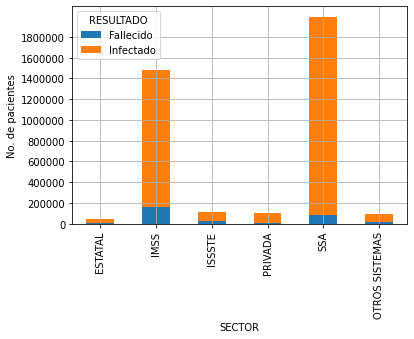

In [53]:
conteo_sectores_sig.plot(kind='bar', stacked=True, grid=True)
plt.yticks(range(0, 2000000, 200000), range(0, 2000000, 200000))
plt.ylabel('No. de pacientes')
plt.show()

## Porcentaje de infectados vs. fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)

In [54]:
conteo_sectores['% de fallecidos'] = conteo_sectores.apply(lambda x: x.Fallecido/(x.Fallecido+x.Infectado)*100, axis=1)

In [55]:
conteo_sectores_ord = conteo_sectores.sort_values('% de fallecidos', axis=0, ascending=False)

In [56]:
conteo_sectores_ord.drop(['DESC.', 'NO ESPEC.'], axis=0, inplace=True)

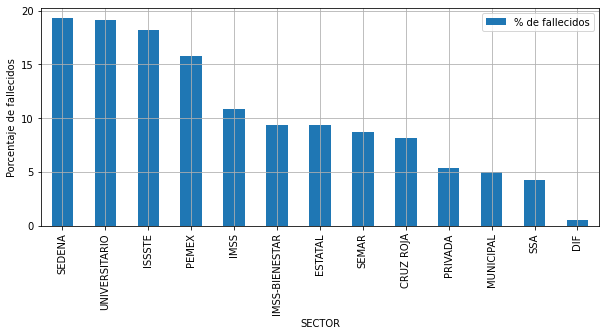

In [57]:
conteo_sectores_ord.plot(y='% de fallecidos', kind='bar', grid=True, figsize=(10,4))
plt.ylabel('Porcentaje de fallecidos')
plt.yticks(range(0, 25, 5), range(0, 25, 5))
plt.show()

## Avance de la pandemia en México (infectados por mes)

Para graficar los infectados y fallecidos por mes, tenemos que calcular los datos por separado (ya que los datos de los pacientes indican dos fechas: de ingreso y de defunción)

In [58]:
# Conteo de infectados por mes y año
conteo_infectados = analisis_df.groupby(['AÑO_INGRESO', 'MES_INGRESO']).count()[['EDAD']]
conteo_infectados.rename({'EDAD': 'Infectados'}, axis=1, inplace=True)
conteo_infectados.index.rename(['AÑO', 'MES'], inplace=True)

In [61]:
# Conteo de fallecidos por mes y año
conteo_fallecidos = analisis_df.groupby(['AÑO_DEF', 'MES_DEF']).count()[['EDAD']]
conteo_fallecidos.rename({'EDAD': 'Fallecidos'}, axis=1, inplace=True)
conteo_fallecidos.index.rename(['AÑO', 'MES'], inplace=True)

In [64]:
# Dropeamos los meses de 9999, que se refieren a personas que no fallecieron
conteo_fallecidos.drop(9999, axis=0, inplace=True)

Después, unimos estos datos en una sola tabla y les damos formato, ya que los meses se representan con números y no con letras.

In [66]:
conteo_meses = pd.merge(conteo_infectados, conteo_fallecidos, left_index=True, right_index=True, how='outer')
conteo_meses = conteo_meses.fillna(0).astype('int32')

Una vez listos los datos, podemos graficar

In [80]:
meses = [f'{meses_dic[x[1]]}-{x[0]}' for x in conteo_meses.index]

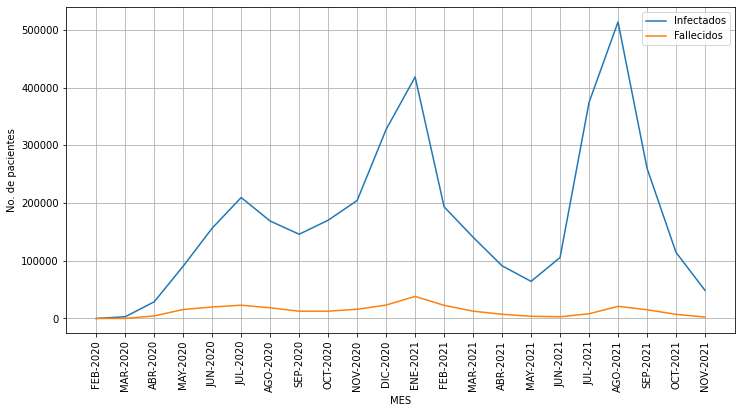

In [81]:
conteo_meses.plot(figsize=(12, 6), grid=True)
plt.xlabel('MES')
plt.ylabel('No. de pacientes')
plt.xticks(range(len(meses)), meses, rotation='vertical')
plt.show()

In [71]:
conteo_meses

Infectados  Fallecidos
AÑO  MES                        
2020 2             8           0
     3          2982          91
     4         28927        4452
     5         90701       15547
     6        156641       19929
     7        209642       23012
     8        168888       18531
     9        146006       12591
     10       170306       12648
     11       204469       15925
     12       327646       23269
2021 1        418643       38177
     2        193539       22800
     3        140853       12637
     4         91283        7265
     5         64319        3794
     6        105628        2961
     7        374525        8154
     8        513970       21037
     9        260501       15153
     10       114596        7175
     11        48713        2407

## Porcentaje de infectados vs. fallecidos según afecciones de salud previas

In [123]:
afecciones = ['NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
             'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
datos_afecciones = []
for afecc in afecciones:
    afecc_rows = (analisis_df[afecc]==1).values
    group = analisis_df[afecc_rows].groupby(analisis_df['FALLECIDO']).count()[afecc]
    datos_afecciones.append(group.values)
conteo_afecciones = pd.DataFrame(datos_afecciones, index=afecciones, columns=['Infectado', 'Fallecido'])

In [124]:
conteo_afecciones['% de fallecidos'] = conteo_afecciones.apply(lambda x: (x.Fallecido/(x.Fallecido + x.Infectado))*100, axis=1)

In [125]:
conteo_afecciones_ordenado = conteo_afecciones.sort_values('% de fallecidos', axis=0, ascending=False)

In [127]:
conteo_afecciones_ordenado

,Infectado,Fallecido,% de fallecidos
NEUMONIA,236932,206699,46.592551
RENAL_CRONICA,27527,19430,41.378282
EPOC,22061,12213,35.633425
CARDIOVASCULAR,33503,13906,29.331983
DIABETES,321700,105507,24.696927
INMUSUPR,19415,6232,24.299138
HIPERTENSION,426937,126774,22.895337
OBESIDAD,405085,61342,13.151469
TABAQUISMO,232342,21342,8.412829
ASMA,70733,4922,6.505849


- Neumonía: 1 de 2
- Renal Cronica: 2 de 5
- EPOC: 1 de 3
- Cardiovascular: 1 de 3
- Diabetes: 1 de 4
- Inmunosupr: 1 de 4
- Hipertension: 1 de 5
- Obesidad: 1 de cada 8
- Tabaquismo: 1 de cada 12
- Asma: 1 de cada 15
- Embarazo: 1 de cada 100

## Porcentaje de infectados vs. fallecidos según complicaciones presentadas

In [128]:
complicaciones = ['INTUBADO', 'UCI']
datos_complicaciones = []
for compl in complicaciones:
    compl_rows = (analisis_df[compl]==1).values
    group = analisis_df[compl_rows].groupby(analisis_df['FALLECIDO']).count()[compl]
    datos_complicaciones.append(group.values)
conteo_complicaciones = pd.DataFrame(datos_complicaciones, index=complicaciones, columns=['Infectado', 'Fallecido'])

In [129]:
conteo_complicaciones['% de fallecidos'] = conteo_complicaciones.apply(lambda x: (x.Fallecido/(x.Fallecido + x.Infectado))*100, axis=1)

In [130]:
conteo_complicaciones

,Infectado,Fallecido,% de fallecidos
INTUBADO,12470,64263,83.748843
UCI,19899,27490,58.009243


- Intubado: 4 de cada 5
- UCI: 3 de cada 5